In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

!pip install mahotas

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 5.2 MB/s 


In [2]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import statistics as stat
import numpy as np
import random
import mahotas
from scipy.stats import skew
from scipy.stats import kurtosis
from numpy import var
train_list = pd.read_csv("AOI_test_check_label0.csv")
train_list 

,ID,Label
0,test_00000.png,0
1,test_00001.png,0
2,test_00002.png,0
3,test_00003.png,0
4,test_00004.png,0
...,...,...
995,test_00995.png,0
996,test_00996.png,0
997,test_00997.png,0
998,test_00998.png,0


image shape: (512, 512, 3)
data type: uint8
min: 119, max: 255


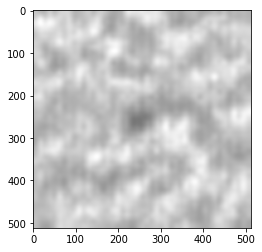

In [3]:
data_path="AOI_Test_Image"
img = cv2.imread(os.path.join(data_path, train_list.loc[0, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [4]:
normal_list = train_list[train_list["Label"]==0]["ID"].values
void_list = train_list[train_list["Label"]==1]["ID"].values
horizontal_defect_list = train_list[train_list["Label"]==2]["ID"].values
vertical_defect_list = train_list[train_list["Label"]==3]["ID"].values
edge_defect_list = train_list[train_list["Label"]==4]["ID"].values
particle_list = train_list[train_list["Label"]==5]["ID"].values
label=[normal_list,void_list,horizontal_defect_list,vertical_defect_list,edge_defect_list,particle_list]
ordered_label = OrderedDict(sorted(Counter(train_list["Label"]).items()))
ordered_label=dict(ordered_label)
ordered_label

{0: 1000}

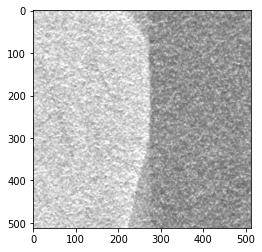

In [5]:
img = cv2.imread(os.path.join(data_path, label[0][100]))
plt.imshow(img)
plt.show()

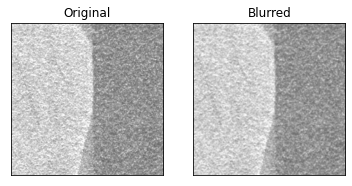

In [6]:
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
img_haralick_mean={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_var={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_skew={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_kur={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
for i in range(len(label[0])):
    img = cv2.imread(os.path.join(data_path, label[0][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["0"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["0"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["0"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["0"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["0"]))

for i in range(len(label[1])):
    img = cv2.imread(os.path.join(data_path, label[1][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["1"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["1"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["1"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["1"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["1"]))

for i in range(len(label[2])):
    img = cv2.imread(os.path.join(data_path, label[2][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["2"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["2"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["2"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["2"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["2"]))

for i in range(len(label[3])):
    img = cv2.imread(os.path.join(data_path, label[3][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["3"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["3"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["3"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["3"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["3"]))

for i in range(len(label[4])):
    img = cv2.imread(os.path.join(data_path, label[4][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["4"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["4"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["4"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["4"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["4"]))

for i in range(len(label[5])):
    img = cv2.imread(os.path.join(data_path, label[5][i]))
    img =cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["5"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["5"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["5"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["5"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["5"]))

1000
0
0
0
0
0


In [8]:
print(img_haralick_mean["0"][0])
print(type(list(img_haralick_mean["0"][0])))
len(img_haralick_mean)

[ 2.88092046e-03  2.01223696e+00  9.97564842e-01  4.13130325e+02
  5.62971124e-01  3.94905194e+02  1.65050906e+03  7.36132228e+00
  8.85175235e+00  1.24990320e-03  1.81435467e+00 -6.09002595e-01
  9.99760610e-01]
<class 'list'>


6

In [9]:
import csv
header=[]
label={"0":(ordered_label[0])*[0]}
for i in range(52):
    header.append(f"X{i}")  
header.append("Label")
with open('/content/drive/Shareddrives/機器學習/第三次討論/blur csv/test_guassian.csv', 'w', newline='') as csvfile:
    # 建立 CSV 檔寫入器
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for i in range(len(img_haralick_mean)):
        for j in range(len(img_haralick_mean[f"{i}"])):
            temp=list(img_haralick_mean[f"{i}"][j])
            temp.extend(list(img_haralick_var[f"{i}"][j]))
            temp.extend(list(img_haralick_skew[f"{i}"][j]))
            temp.extend(list(img_haralick_kur[f"{i}"][j]))
            temp.append(label[f"{i}"][j])
            writer.writerow(np.array(temp))


